In [19]:
# подгружаем все нужные пакеты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [20]:
train = pd.read_csv('mlbootcamp5_train.csv', sep=';',
                    index_col='id')

In [21]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


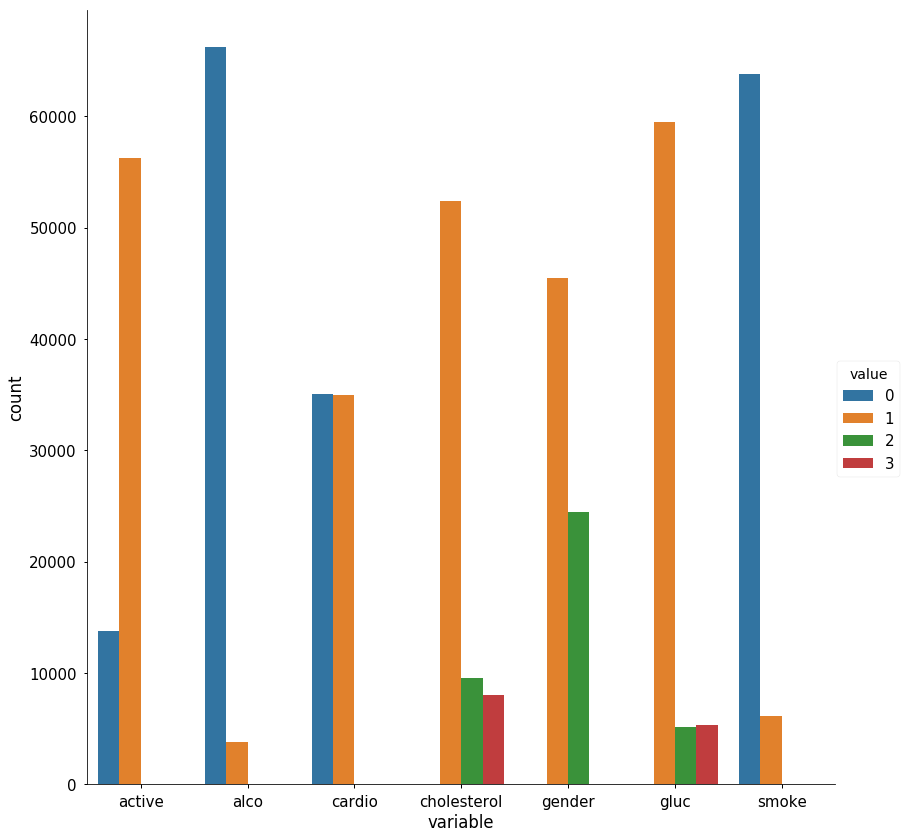

In [22]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

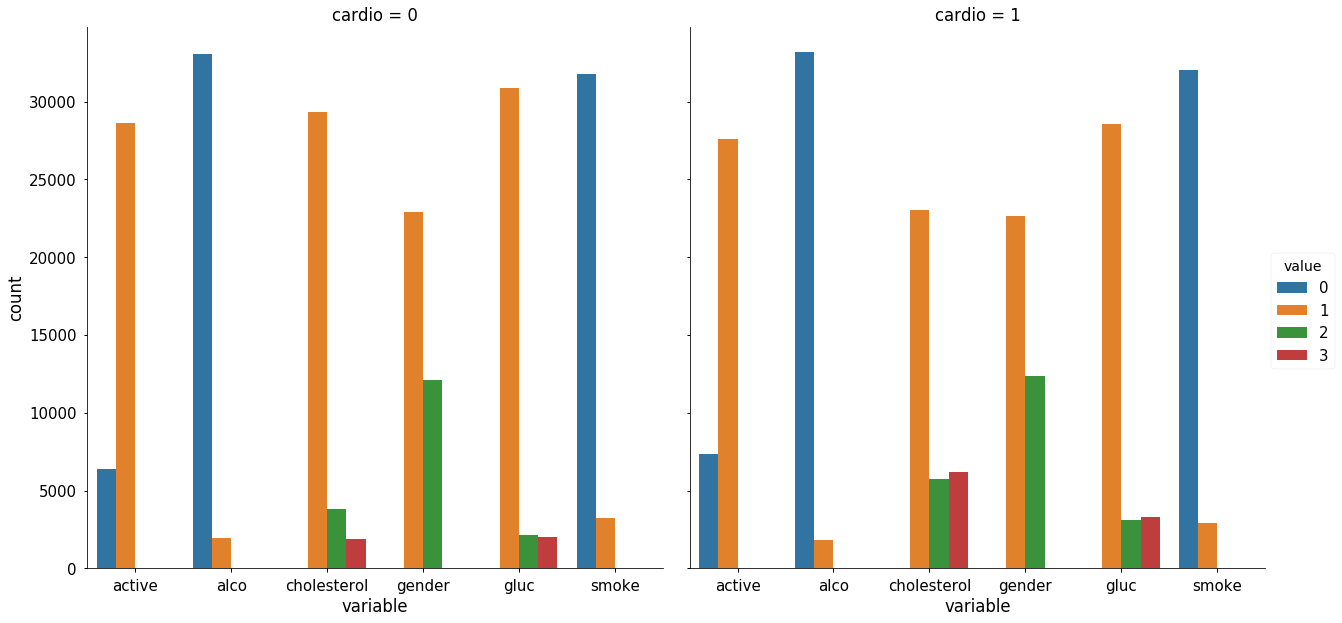

In [23]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=9);

In [24]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


---

In [25]:
def show_corr_matrix(corr_matrix):
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(
        corr_matrix, 
        annot=True, 
        vmax=1, 
        center=0, 
        fmt='.2f', 
        square=True, 
        linewidths=.5,
        mask=mask
    )
    plt.show()
def task1(main_df):
    pearson_corr_matrix = main_df.corr(method="pearson")
    corr_with_height = pearson_corr_matrix.sort_values(by=["height"], ascending=False)["height"]

    print(corr_with_height[1:3])

    show_corr_matrix(pearson_corr_matrix)

gender    0.499033
weight    0.290968
Name: height, dtype: float64


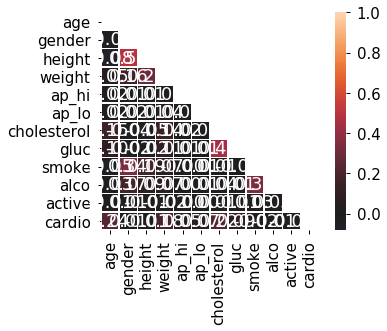

In [26]:
task1(train)

---

In [27]:
def task2(main_df):
    melt_df = pd.melt(frame=main_df, value_vars=['height'], id_vars=['gender'])
    sns.violinplot(
        x="variable", 
        y="value", 
        hue="gender", 
        scale='count', 
        palette="muted", 
        split=True, 
        data=melt_df, 
        scale_hue=False
    )
    plt.show()
def task2_part_2(main_df):
    sns.FacetGrid(main_df, hue="gender", size=10).map(sns.kdeplot, "height").add_legend()
    plt.show()

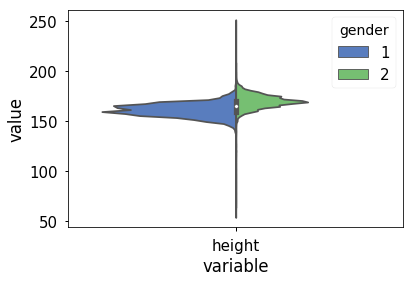

In [28]:
task2(train)

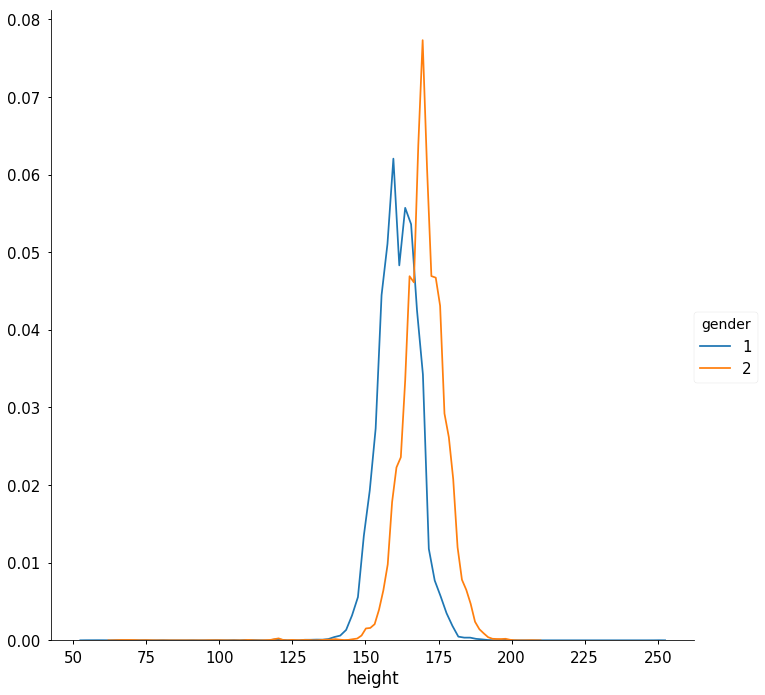

In [29]:
task2_part_2(train)

---

In [30]:
def task3(main_df):
    spearman_corr_matrix = main_df.corr(method="spearman")
    spearman_corr_unstack = spearman_corr_matrix.unstack().sort_values(ascending=False)
    show_corr_matrix(spearman_corr_matrix)

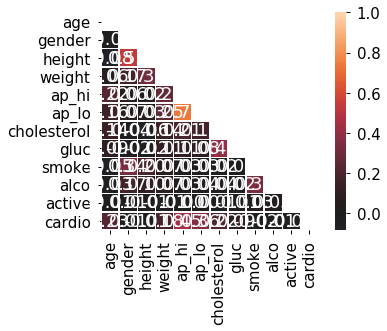

In [31]:
task3(train)

In [32]:
def task4(main_df):
    sns.jointplot(
        main_df['ap_hi'],
        main_df['ap_lo'],
        marker=".",
        size=10,
        marginal_kws=dict(bins=100, rug=False, hist_kws={'log': True})
    )
    plt.show()

def task4_part_2(main_df):
    local_df = main_df[
        (main_df['ap_lo'] > 0) & 
        (main_df['ap_hi'] > 0)
    ][['ap_lo', 'ap_hi']].apply(np.log)

    graphic = sns.jointplot(
        local_df['ap_hi'],
        local_df['ap_lo'],
        marker=".",
        stat_func=None,
        size=10,
        marginal_kws=dict(bins=100, rug=False, hist_kws={'log': True})
    )
    graphic.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
    graphic.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

    plt.show()


/home/novikor/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


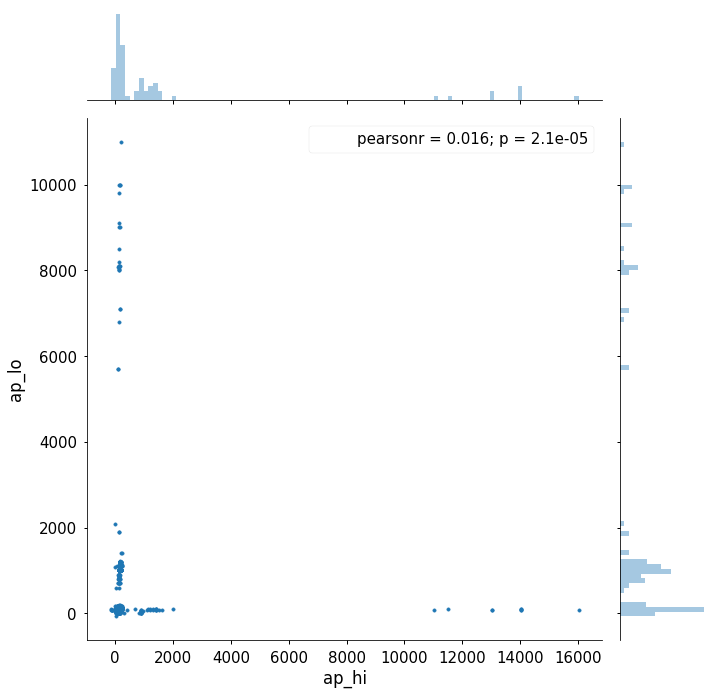

In [33]:
task4(train)

/home/novikor/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


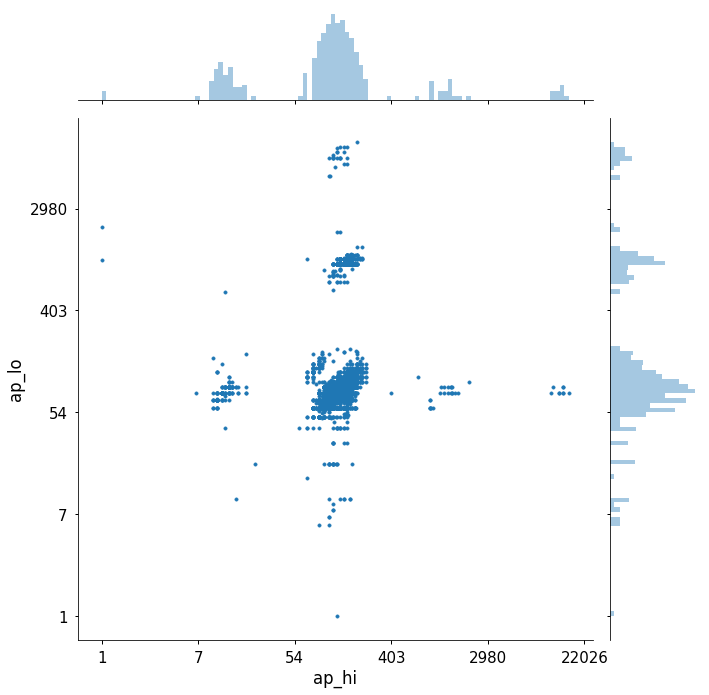

In [34]:
task4_part_2(train)

In [35]:
def task5(main_df):
    main_df["year"] = (main_df["age"] // 365.25).astype(int)
    sns.countplot(x="year", hue="cardio", data=main_df)

    plt.show()

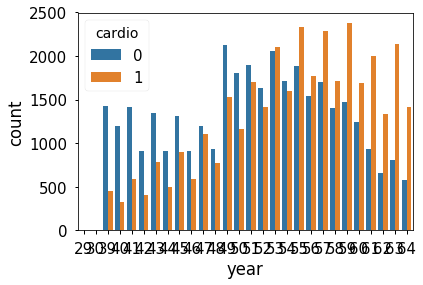

In [36]:
task5(train)